In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dependencies**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/content/drive/My Drive/facemask_data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3506.jpg', 'with_mask_3430.jpg', 'with_mask_3469.jpg', 'with_mask_3355.jpg', 'with_mask_3409.jpg']
['with_mask_1763.jpg', 'with_mask_1654.jpg', 'with_mask_1695.jpg', 'with_mask_1735.jpg', 'with_mask_1749.jpg']


In [4]:
without_mask_files = os.listdir('/content/drive/My Drive/facemask_data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3385.jpg', 'without_mask_3522.jpg', 'without_mask_3464.jpg', 'without_mask_3449.jpg', 'without_mask_3422.jpg']
['without_mask_1822.jpg', 'without_mask_1748.jpg', 'without_mask_1713.jpg', 'without_mask_1743.jpg', 'without_mask_1814.jpg']


In [65]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3745
Number of without mask images: 3838


**Creating Labels for the two class of Images**

**with mask --> 1**

**without mask --> 0**

In [35]:
# create the labels

with_mask_labels = [1]*3745

without_mask_labels = [0]*3838

In [36]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [37]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3745
3838


In [38]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7583
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

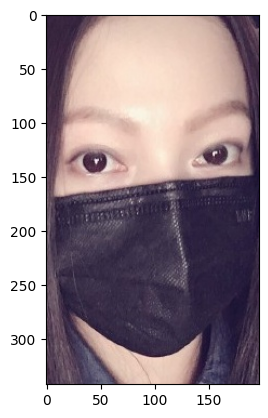

In [39]:
# displaying with mask image
img = mpimg.imread('/content/drive/My Drive/facemask_data/with_mask/with_mask_22.jpg')
imgplot = plt.imshow(img)
plt.show()

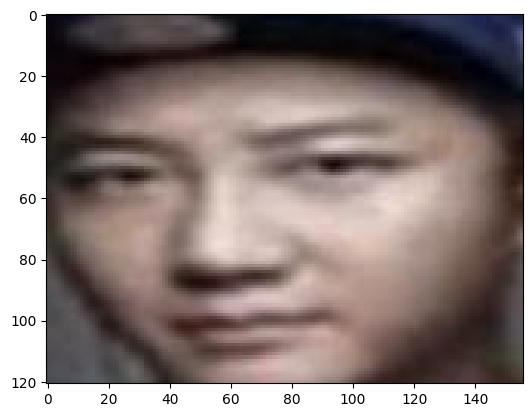

In [40]:
# displaying without mask image
img = mpimg.imread('/content/drive/My Drive/facemask_data/without_mask/without_mask_72.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

**Resize the Images**

**Convert the images to numpy arrays**

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/My Drive/facemask_data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/drive/My Drive/facemask_data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [41]:
type(data)

list

In [42]:
len(data)

7583

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
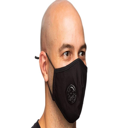

In [43]:
data[0]

In [44]:
type(data[0])

numpy.ndarray

In [45]:
data[0].shape

(128, 128, 3)

In [46]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [47]:
type(X)

numpy.ndarray

In [48]:
type(Y)

numpy.ndarray

In [49]:
print(X.shape)
print(Y.shape)

(7583, 128, 128, 3)
(7583,)


In [50]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(7583, 128, 128, 3) (6066, 128, 128, 3) (1517, 128, 128, 3)


In [53]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[100, 124,  85],
        [ 99, 126,  83],
        [ 93, 123,  76],
        ...,
        [106, 132,  93],
        [105, 132,  90],
        [104, 131,  86]],

       [[114, 132,  99],
        [114, 135,  98],
        [110, 135,  94],
        ...,
        [105, 131,  94],
        [105, 131,  90],
        [104, 131,  86]],

       [[122, 132, 107],
        [120, 133, 104],
        [116, 133, 100],
        ...,
        [104, 130,  94],
        [104, 130,  91],
        [104, 131,  89]],

       ...,

       [[ 46,  31,  46],
        [ 26,   9,  20],
        [ 12,   0,   0],
        ...,
        [ 28,  29,  15],
        [ 23,  25,  13],
        [ 17,  19,  10]],

       [[  8,   0,   2],
        [ 16,   3,   6],
        [ 26,  10,  10],
        ...,
        [ 36,  35,  22],
        [ 36,  37,  24],
        [ 34,  36,  25]],

       [[ 13,   3,   4],
        [ 22,  10,   9],
        [ 30,  16,  15],
        ...,
        [ 31,  29,  17],
        [ 32,  31,  20],
        [ 29,  29,  19]]], dtype=uint8)
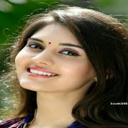

In [54]:
X_train[0]

In [55]:
X_train_scaled[0]

array([[[0.39215686, 0.48627451, 0.33333333],
        [0.38823529, 0.49411765, 0.3254902 ],
        [0.36470588, 0.48235294, 0.29803922],
        ...,
        [0.41568627, 0.51764706, 0.36470588],
        [0.41176471, 0.51764706, 0.35294118],
        [0.40784314, 0.51372549, 0.3372549 ]],

       [[0.44705882, 0.51764706, 0.38823529],
        [0.44705882, 0.52941176, 0.38431373],
        [0.43137255, 0.52941176, 0.36862745],
        ...,
        [0.41176471, 0.51372549, 0.36862745],
        [0.41176471, 0.51372549, 0.35294118],
        [0.40784314, 0.51372549, 0.3372549 ]],

       [[0.47843137, 0.51764706, 0.41960784],
        [0.47058824, 0.52156863, 0.40784314],
        [0.45490196, 0.52156863, 0.39215686],
        ...,
        [0.40784314, 0.50980392, 0.36862745],
        [0.40784314, 0.50980392, 0.35686275],
        [0.40784314, 0.51372549, 0.34901961]],

       ...,

       [[0.18039216, 0.12156863, 0.18039216],
        [0.10196078, 0.03529412, 0.07843137],
        [0.04705882, 0

**Building a Convolutional Neural Networks (CNN)**

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [59]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 135s 776ms/step - acc: 0.6594 - loss: 0.8074 - val_acc: 0.8287 - val_loss: 0.4110
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 142s 776ms/step - acc: 0.8784 - loss: 0.3197 - val_acc: 0.8979 - val_loss: 0.2554
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 149s 817ms/step - acc: 0.9064 - loss: 0.2379 - val_acc: 0.9193 - val_loss: 0.2263
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 136s 796ms/step - acc: 0.9196 - loss: 0.2013 - val_acc: 0.9226 - val_loss: 0.2044
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 136s 759ms/step - acc: 0.9409 - loss: 0.1493 - val_acc: 0.9292 - val_loss: 0.2050


**Model Evaluation**

In [60]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - acc: 0.9053 - loss: 0.2843
Test Accuracy = 0.9044166207313538


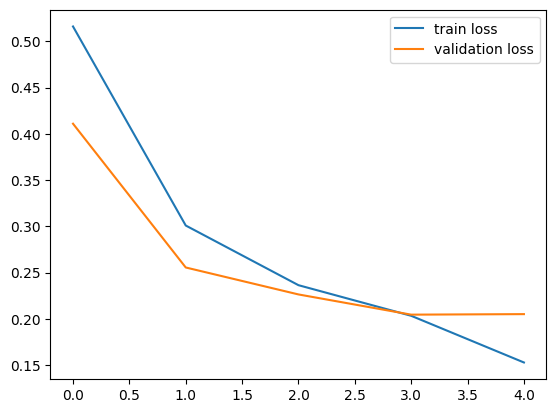

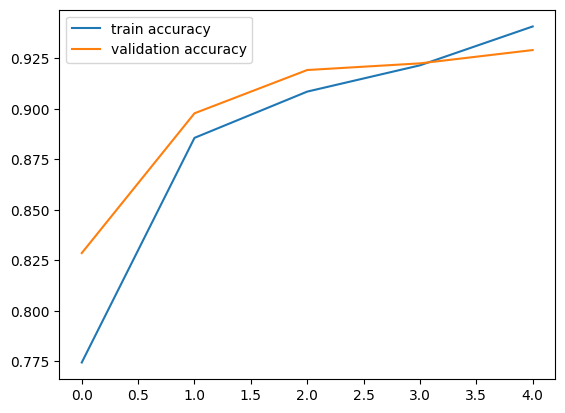

In [61]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpeg


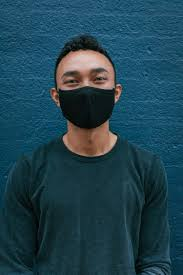

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.18032737 0.80806243]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')